## Importing libraries

In [1]:
import numpy as np
import pandas as pd


### loading dataset

In [2]:
data1 = pd.read_csv('mainSimulationAccessTraces.csv')

In [3]:
data1

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


### Preprocessing and cleaning the dataset

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   357952 non-null  object
 1   sourceAddress              357952 non-null  object
 2   sourceType                 357952 non-null  object
 3   sourceLocation             357952 non-null  object
 4   destinationServiceAddress  357952 non-null  object
 5   destinationServiceType     357952 non-null  object
 6   destinationLocation        357952 non-null  object
 7   accessedNodeAddress        357952 non-null  object
 8   accessedNodeType           357804 non-null  object
 9   operation                  357952 non-null  object
 10  value                      355902 non-null  object
 11  timestamp                  357952 non-null  int64 
 12  normality                  357952 non-null  object
dtypes: int64(1), object(12)
memory usage: 35.5+ 

In [5]:
data1['accessedNodeType'].head(10)

0    /lightControler
1    /lightControler
2    /lightControler
3    /lightControler
4    /movementSensor
5     /sensorService
6    /movementSensor
7     /sensorService
8     /sensorService
9    /movementSensor
Name: accessedNodeType, dtype: object

In [6]:
data1['accessedNodeType'].value_counts()

/sensorService      130155
/derived/boolean     94725
/basic/number        90016
/basic/text          42433
/thermostat            313
/basic/composed        100
/lightControler         23
/movementSensor         22
/batteryService          6
/doorLockService         5
/washingService          3
/smartPhone              3
Name: accessedNodeType, dtype: int64

In [7]:

data1['accessedNodeType'].isnull().value_counts()

False    357804
True        148
Name: accessedNodeType, dtype: int64

In [8]:

data1.sourceLocation.value_counts()

Garage             39501
Watterroom         38369
Entrance           38220
Bathroom           28461
Showerroom         28315
Kitchen            18963
Dinningroom        13430
BedroomChildren    12836
room_6             11642
Bedroom            11009
BedroomParents     10946
room_8             10798
room_9             10752
Livingroom         10621
room_2             10607
room_1             10602
room_3             10597
room_5             10596
room_4             10572
room_7             10558
room_10            10557
Name: sourceLocation, dtype: int64

In [9]:
df1 = data1.dropna()

In [10]:
df1 = pd.DataFrame(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355902 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   355902 non-null  object
 1   sourceAddress              355902 non-null  object
 2   sourceType                 355902 non-null  object
 3   sourceLocation             355902 non-null  object
 4   destinationServiceAddress  355902 non-null  object
 5   destinationServiceType     355902 non-null  object
 6   destinationLocation        355902 non-null  object
 7   accessedNodeAddress        355902 non-null  object
 8   accessedNodeType           355902 non-null  object
 9   operation                  355902 non-null  object
 10  value                      355902 non-null  object
 11  timestamp                  355902 non-null  int64 
 12  normality                  355902 non-null  object
dtypes: int64(1), object(12)
memory usage: 38.0+ 

In [11]:
df1['value'].value_counts().index

Index(['1', '0', 'false', 'true', '10', '5', '2', '4', '6', '7',
       ...
       '1.52121734717E12',
       'org.ds2os.vsl.core.utils.AddressParameters@61ba9b2b',
       'org.ds2os.vsl.core.utils.AddressParameters@2c82b391',
       '1.521217447122E12', '1.521216923287E12', '1.521217446778E12',
       '1.521220297057E12', '1.521220308496E12', '1.521220325816E12',
       '1.521225180883E12'],
      dtype='object', length=10623)

In [12]:
df1['value'].value_counts()

1                    57047
0                    50282
false                25966
true                 14460
10                    9635
                     ...  
1.521217446778E12        1
1.521220297057E12        1
1.521220308496E12        1
1.521220325816E12        1
1.521225180883E12        1
Name: value, Length: 10623, dtype: int64

In [13]:
df1.loc[df1.value=='twenty',"value"] = '20.0'
df1.loc[df1.value=='false',"value"] = '0'
df1.loc[df1.value=='true',"value"] = '1'
df1.loc[df1.value=='none',"value"] = '0'
df1.loc[df1.value=='0',"value"] = '0.0'
df1['value'] = df1['value'].fillna(value='60.0')
df1 = df1.drop(df1.index[df1.value.str.contains("org.*")])
df1.value = df1.value.astype(float)

In [14]:
df1['value'].value_counts()

0.000000e+00    76624
1.000000e+00    71507
1.000000e+01     9635
5.000000e+00     8487
2.000000e+00     8438
                ...  
3.857174e+01        1
1.521218e+12        1
1.521218e+12        1
1.521217e+12        1
1.521225e+12        1
Name: value, Length: 10606, dtype: int64

In [15]:
for i in df1.columns:
  print(i)

sourceID
sourceAddress
sourceType
sourceLocation
destinationServiceAddress
destinationServiceType
destinationLocation
accessedNodeAddress
accessedNodeType
operation
value
timestamp
normality


### Plotting Graphs

In [16]:
from matplotlib import pyplot as plt
import random

#### counting the number of source locations

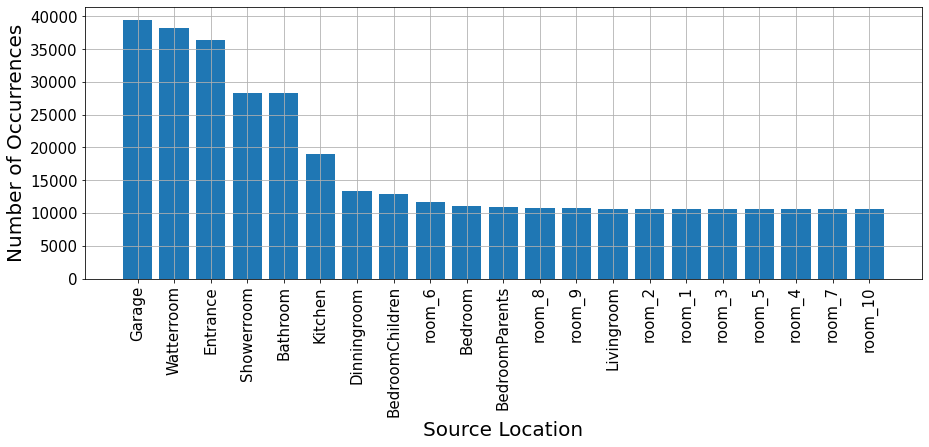

In [17]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.sourceLocation.value_counts().index, df1.sourceLocation.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [18]:
df1.sourceLocation.value_counts()

Garage             39499
Watterroom         38268
Entrance           36437
Showerroom         28315
Bathroom           28313
Kitchen            18946
Dinningroom        13426
BedroomChildren    12833
room_6             11642
Bedroom            11009
BedroomParents     10946
room_8             10798
room_9             10752
Livingroom         10620
room_2             10606
room_1             10601
room_3             10597
room_5             10596
room_4             10572
room_7             10558
room_10            10557
Name: sourceLocation, dtype: int64

### counting the number of source type

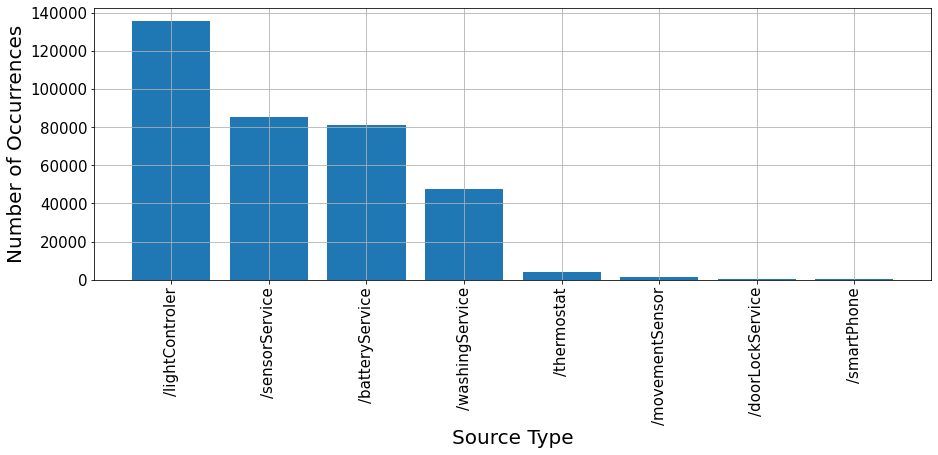

In [19]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.sourceType.value_counts().index, df1.sourceType.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Type', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
print(df1.sourceType.value_counts())


/lightControler     135775
/sensorService       85196
/batteryService      81251
/washingService      47738
/thermostat           4200
/movementSensor       1301
/doorLockService       330
/smartPhone            100
Name: sourceType, dtype: int64


### counting the number of destination service type

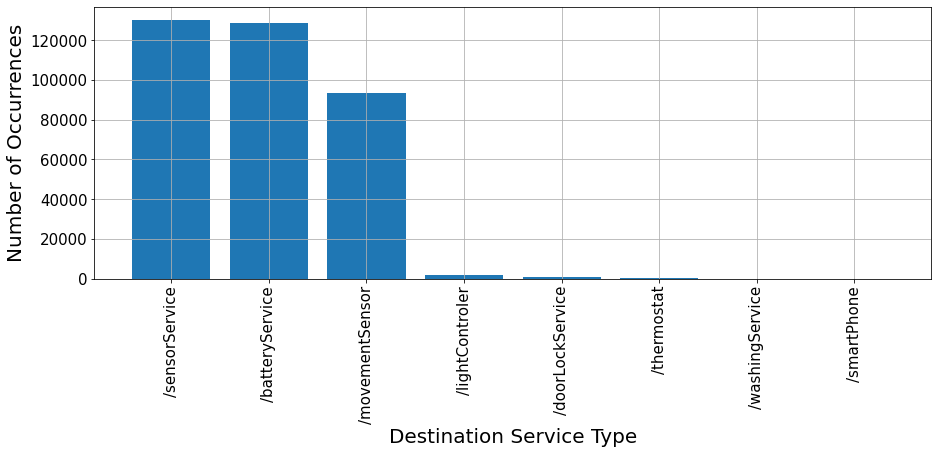

In [21]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.destinationServiceType.value_counts().index, df1.destinationServiceType.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
df1.destinationServiceType.value_counts()

/sensorService      130313
/batteryService     128871
/movementSensor      93645
/lightControler       1694
/doorLockService      1043
/thermostat            319
/washingService          3
/smartPhone              3
Name: destinationServiceType, dtype: int64

### counting the number of destination location

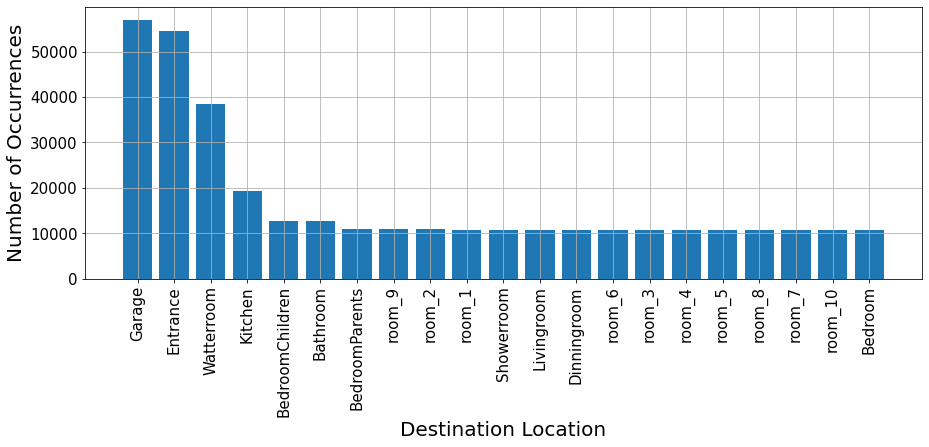

In [23]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.destinationLocation.value_counts().index, df1.destinationLocation.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [24]:
df1.destinationLocation.value_counts()

Garage             57026
Entrance           54448
Watterroom         38408
Kitchen            19363
BedroomChildren    12768
Bathroom           12681
BedroomParents     10938
room_9             10843
room_2             10828
room_1             10805
Showerroom         10800
Livingroom         10781
Dinningroom        10759
room_6             10741
room_3             10732
room_4             10708
room_5             10687
room_8             10651
room_7             10649
room_10            10648
Bedroom            10627
Name: destinationLocation, dtype: int64

### counting the number of Accessed Node type

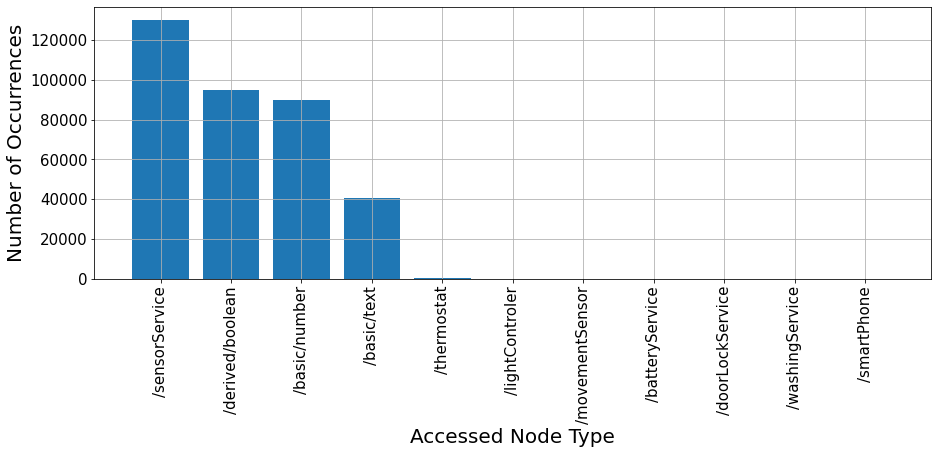

In [25]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.accessedNodeType.value_counts().index, df1.accessedNodeType.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node Type', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [26]:
df1.accessedNodeType.value_counts()

/sensorService      130155
/derived/boolean     94725
/basic/number        90010
/basic/text          40626
/thermostat            313
/lightControler         23
/movementSensor         22
/batteryService          6
/doorLockService         5
/washingService          3
/smartPhone              3
Name: accessedNodeType, dtype: int64

### counting the number of operations

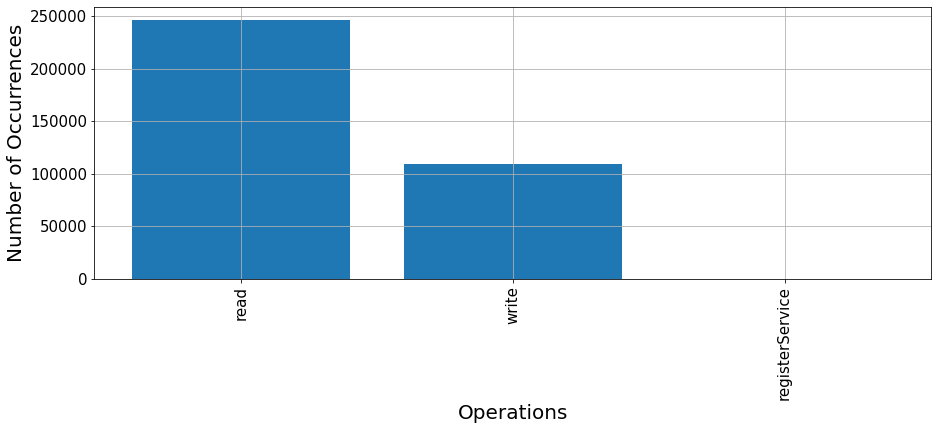

In [27]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.operation.value_counts().index, df1.operation.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operations', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [28]:
df1.operation.value_counts()

read               246259
write              109548
registerService        84
Name: operation, dtype: int64

### counting the number of normality

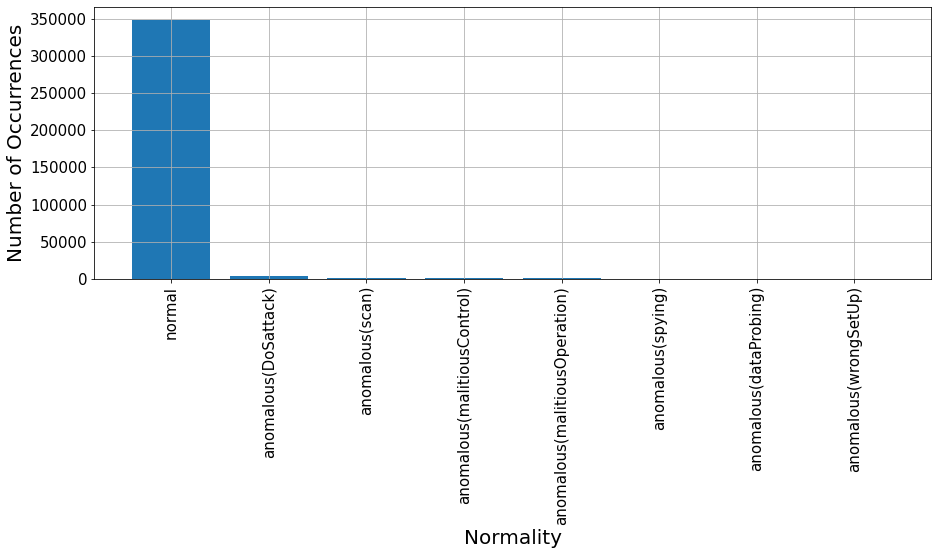

In [29]:
plt.figure(figsize=(15,5))
plt.bar(df1.normality.value_counts().index, df1.normality.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Normality', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [30]:
df1.normality.value_counts()

normal                           347918
anomalous(DoSattack)               4000
anomalous(scan)                    1531
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       657
anomalous(spying)                   532
anomalous(dataProbing)              242
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

## Feature Extraction

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355891 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sourceID                   355891 non-null  object 
 1   sourceAddress              355891 non-null  object 
 2   sourceType                 355891 non-null  object 
 3   sourceLocation             355891 non-null  object 
 4   destinationServiceAddress  355891 non-null  object 
 5   destinationServiceType     355891 non-null  object 
 6   destinationLocation        355891 non-null  object 
 7   accessedNodeAddress        355891 non-null  object 
 8   accessedNodeType           355891 non-null  object 
 9   operation                  355891 non-null  object 
 10  value                      355891 non-null  float64
 11  timestamp                  355891 non-null  int64  
 12  normality                  355891 non-null  object 
dtypes: float64(1), int64(1), obje

### Dropping irrelavant columns
timestamp doesnt provide any vital info hence dropping it

In [32]:
df1 = df1.drop(['timestamp'],axis=1)


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355891 entries, 0 to 357951
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sourceID                   355891 non-null  object 
 1   sourceAddress              355891 non-null  object 
 2   sourceType                 355891 non-null  object 
 3   sourceLocation             355891 non-null  object 
 4   destinationServiceAddress  355891 non-null  object 
 5   destinationServiceType     355891 non-null  object 
 6   destinationLocation        355891 non-null  object 
 7   accessedNodeAddress        355891 non-null  object 
 8   accessedNodeType           355891 non-null  object 
 9   operation                  355891 non-null  object 
 10  value                      355891 non-null  float64
 11  normality                  355891 non-null  object 
dtypes: float64(1), object(11)
memory usage: 35.3+ MB


In [34]:
df1.iloc[:,11].values

array(['normal', 'normal', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype=object)

### using inbuilt preprocessing methods such as label encoding we will scale the data 

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
x0 = le.fit_transform(df1.iloc[:,0].values)
x1 = le.fit_transform(df1.iloc[:,1].values)
x2 = le.fit_transform(df1.iloc[:,2].values)
x3 = le.fit_transform(df1.iloc[:,3].values)
x4 = le.fit_transform(df1.iloc[:,4].values)
x5 = le.fit_transform(df1.iloc[:,5].values)
x6 = le.fit_transform(df1.iloc[:,6].values)
x7 = le.fit_transform(df1.iloc[:,7].values)
x8 = le.fit_transform(df1.iloc[:,8].values)
x9 = le.fit_transform(df1.iloc[:,9].values)
x10 = le.fit_transform(df1.iloc[:,10].values)
y = le.fit_transform(df1.iloc[:,11].values)

### joining all x values together

In [37]:
x = list(zip(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
y = list(y)

In [38]:
x

[(21, 30, 2, 3, 29, 2, 3, 57, 5, 1, 0),
 (32, 70, 2, 4, 67, 2, 4, 132, 5, 1, 0),
 (15, 1, 2, 2, 0, 2, 2, 0, 5, 1, 0),
 (33, 77, 2, 7, 72, 2, 7, 142, 5, 1, 0),
 (55, 78, 3, 7, 73, 3, 7, 144, 6, 1, 0),
 (66, 34, 4, 3, 31, 4, 3, 62, 7, 1, 0),
 (43, 32, 3, 3, 30, 3, 3, 59, 6, 1, 0),
 (78, 79, 4, 7, 74, 4, 7, 147, 7, 1, 0),
 (61, 4, 4, 2, 2, 4, 2, 5, 7, 1, 0),
 (37, 2, 3, 2, 1, 3, 2, 2, 6, 1, 0),
 (54, 71, 3, 4, 68, 3, 4, 134, 6, 1, 0),
 (77, 73, 4, 4, 70, 4, 4, 138, 7, 1, 0),
 (56, 83, 3, 6, 78, 3, 6, 156, 6, 1, 0),
 (34, 82, 2, 6, 77, 2, 6, 154, 5, 1, 0),
 (79, 84, 4, 6, 79, 4, 6, 159, 7, 1, 0),
 (77, 73, 4, 4, 70, 4, 4, 138, 7, 2, 5490),
 (54, 71, 3, 4, 68, 3, 4, 136, 3, 2, 1),
 (57, 86, 3, 0, 81, 3, 0, 162, 6, 1, 0),
 (35, 85, 2, 0, 80, 2, 0, 160, 5, 1, 0),
 (54, 71, 3, 4, 68, 3, 4, 135, 0, 2, 10031),
 (38, 7, 3, 8, 5, 3, 8, 10, 6, 1, 0),
 (80, 87, 4, 0, 82, 4, 0, 165, 7, 1, 0),
 (61, 4, 4, 2, 2, 4, 2, 5, 7, 2, 3417),
 (77, 73, 4, 4, 70, 4, 4, 138, 7, 2, 4114),
 (39, 12, 3, 10, 11, 3, 1

In [39]:
y

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [40]:
x = np.array(x)
y = np.array(y)
print("The shape of x is: ",x.shape)
print("The shape of y is: ",y.shape)

The shape of x is:  (355891, 11)
The shape of y is:  (355891,)


### labels of output

In [41]:
le.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [42]:
le.transform(['anomalous(DoSattack)'])

array([0])

In [43]:
y

array([7, 7, 7, ..., 7, 7, 7])

In [44]:
y = y.reshape(-1,1)

In [45]:
y.shape

(355891, 1)

### we will create a new dataset that will contain the information in required format

In [46]:
dataset = np.concatenate((y,x),axis=1)
dataseta

array([[   7,   21,   30, ...,    5,    1,    0],
       [   7,   32,   70, ...,    5,    1,    0],
       [   7,   15,    1, ...,    5,    1,    0],
       ...,
       [   7,   82,   14, ...,    1,    0,    1],
       [   7,   30,   62, ...,    3,    0,    0],
       [   7,   30,   62, ...,    7,    0, 9156]], dtype=int64)

In [47]:
dataset = pd.DataFrame(dataset)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11
0,7,21,30,2,3,29,2,3,57,5,1,0
1,7,32,70,2,4,67,2,4,132,5,1,0
2,7,15,1,2,2,0,2,2,0,5,1,0
3,7,33,77,2,7,72,2,7,142,5,1,0
4,7,55,78,3,7,73,3,7,144,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
355886,7,25,46,2,15,45,4,15,90,7,0,8505
355887,7,82,14,7,10,8,0,10,16,0,0,22
355888,7,82,14,7,10,8,0,10,17,1,0,1
355889,7,30,62,2,20,60,3,20,120,3,0,0


In [55]:
dataset.to_csv('dataset.csv',index=False)

### Now we have our dataset in the required format here on we will apply ML algorithms

### loading appropriate dataset

In [49]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7,21,30,2,3,29,2,3,57,5,1,0
1,1,7,32,70,2,4,67,2,4,132,5,1,0
2,2,7,15,1,2,2,0,2,2,0,5,1,0
3,3,7,33,77,2,7,72,2,7,142,5,1,0
4,4,7,55,78,3,7,73,3,7,144,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355886,355886,7,25,46,2,15,45,4,15,90,7,0,8505
355887,355887,7,82,14,7,10,8,0,10,16,0,0,22
355888,355888,7,82,14,7,10,8,0,10,17,1,0,1
355889,355889,7,30,62,2,20,60,3,20,120,3,0,0


In [50]:
data.drop(columns = "Unnamed: 0", inplace = True)

In [51]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7,21,30,2,3,29,2,3,57,5,1,0
1,7,32,70,2,4,67,2,4,132,5,1,0
2,7,15,1,2,2,0,2,2,0,5,1,0
3,7,33,77,2,7,72,2,7,142,5,1,0
4,7,55,78,3,7,73,3,7,144,6,1,0


In [52]:
y = data.iloc[:,0].values
X = data.iloc[:,1:].values
x

array([[  21,   30,    2, ...,    5,    1,    0],
       [  32,   70,    2, ...,    5,    1,    0],
       [  15,    1,    2, ...,    5,    1,    0],
       ...,
       [  82,   14,    7, ...,    1,    0,    1],
       [  30,   62,    2, ...,    3,    0,    0],
       [  30,   62,    2, ...,    7,    0, 9156]], dtype=int64)

In [53]:
y

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

### Splitting the dataset into training and testing